## Task 1 (30 points): Implement a Decision Tree Classifier for your classification problem. You may use a built-in package to implement your classifier. Additionally, do the following:

* Visualize the decision tree structure for at least three different parameter settings.
Comment on how the depth and complexity change the tree.
* Do some research on what sensitivity analysis is and how it is performed (include citations). Perform a sensitivity analysis to measure the impact of at least two input features on your model's decision boundary.

In [128]:
# prompt: connect to drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
ls drive/MyDrive/RPI/Spr2025/ProjAiMl/homework1/

dataset_traffic_accident_prediction1.csv  ProjAiMl-homework1.ipynb


In [130]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [131]:
# Assuming you've downloaded the dataset to the specified path
df = pd.read_csv('drive/MyDrive/RPI/Spr2025/ProjAiMl/homework1/dataset_traffic_accident_prediction1.csv', sep=',', header=0)
df = df.head(3000)  # Using only the first 3000 samples
df.isnull().sum()

,0
Weather,42
Road_Type,42
Time_of_Day,42
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Accident_Severity,42
Road_Condition,42
Vehicle_Type,42


In [132]:
# Drop non-numerical columns
df = df.select_dtypes(include=['number'])

In [133]:
# Create imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit imputer to data
imputer.fit(df)

# Transform data with imputation
df = pd.DataFrame(imputer.transform(df), columns=df.columns)
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.764996,31.239892,1.966127,0.357899,14.746297,14.886008,0.446707
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,31.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.259398,38.981203,0.000000
75%,2.000000,80.000000,4.000000,0.000000,55.000000,52.000000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [134]:
df['Accident'] = df['Accident'].astype(int)  # Convert 'Accident' column to integers
X = df.drop('Accident', axis=1)  # Features (avvident parameters)
y = df['Accident']  # Target variable (accident)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
y_train.head()

,Accident
396,0
145,0
423,0
234,0
220,0


In [136]:
import graphviz
from sklearn.tree import export_graphviz


def visualive_decision_tree(dtcModel):

    # Visualize the tree using export_graphviz (for a more detailed view)
    dot_data = export_graphviz(dtcModel, out_file=None,
                             feature_names=X.columns,
                             class_names=['No Accident', 'Accident'],
                             filled=True, rounded=True,
                             special_characters=True)
    graph = graphviz.Source(dot_data)

    display(graph)

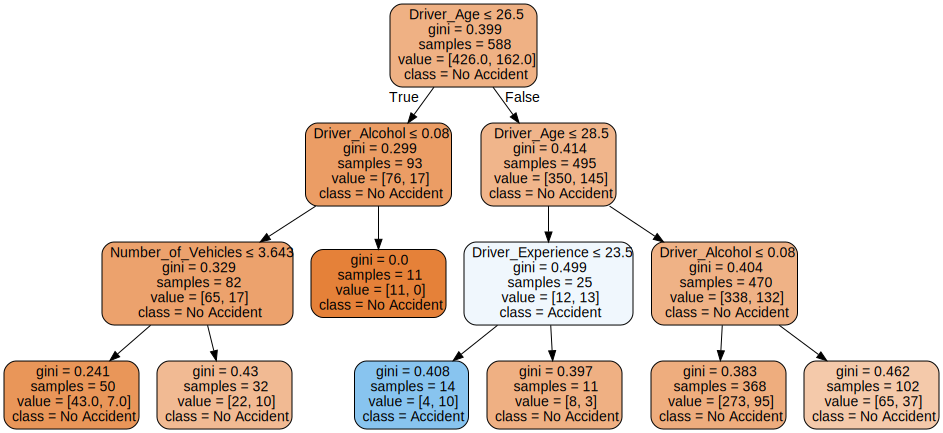

Accuracy: 0.6865079365079365


In [137]:
# Start with a maximum depth of 3 and Gini impurity criterion
dtcGini3 = DecisionTreeClassifier(random_state=42, max_depth=3, criterion='gini')
dtcGini3.fit(X_train, y_train)
visualive_decision_tree(dtcGini3)
y_pred = dtcGini3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

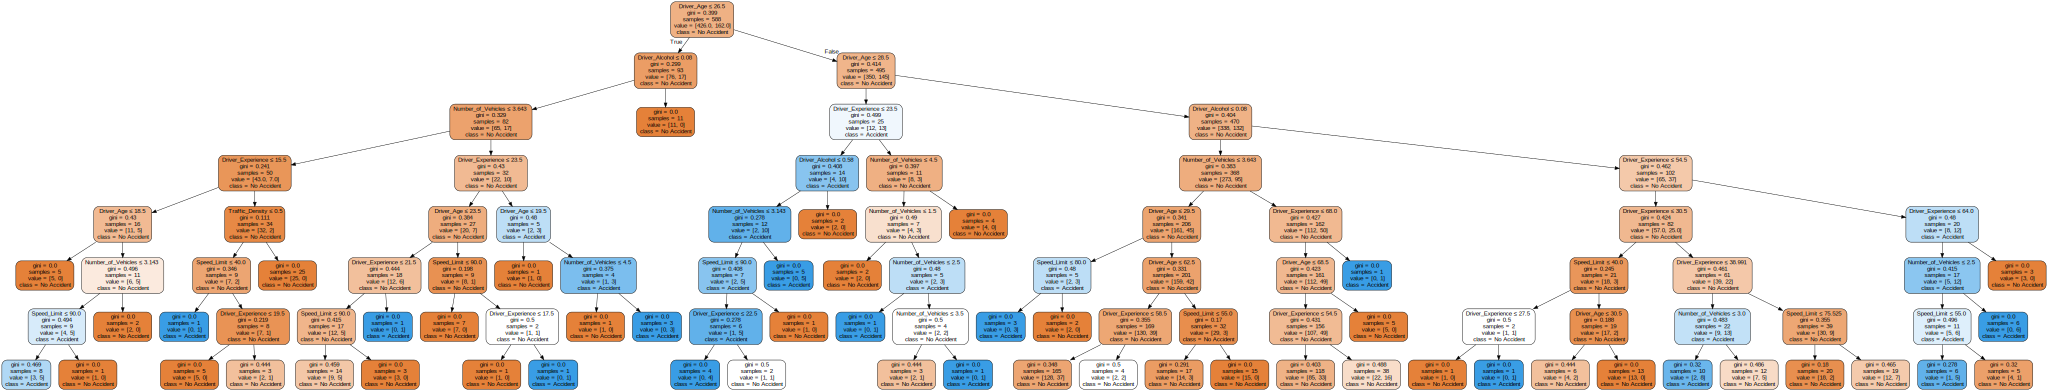

Accuracy: 0.6666666666666666


In [138]:
# Testing with a maximum depth of 7 and Gini impurity criterion
dtcGini7 = DecisionTreeClassifier(random_state=42, max_depth=7, criterion='gini')
dtcGini7.fit(X_train, y_train)
visualive_decision_tree(dtcGini7)
y_pred = dtcGini7.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

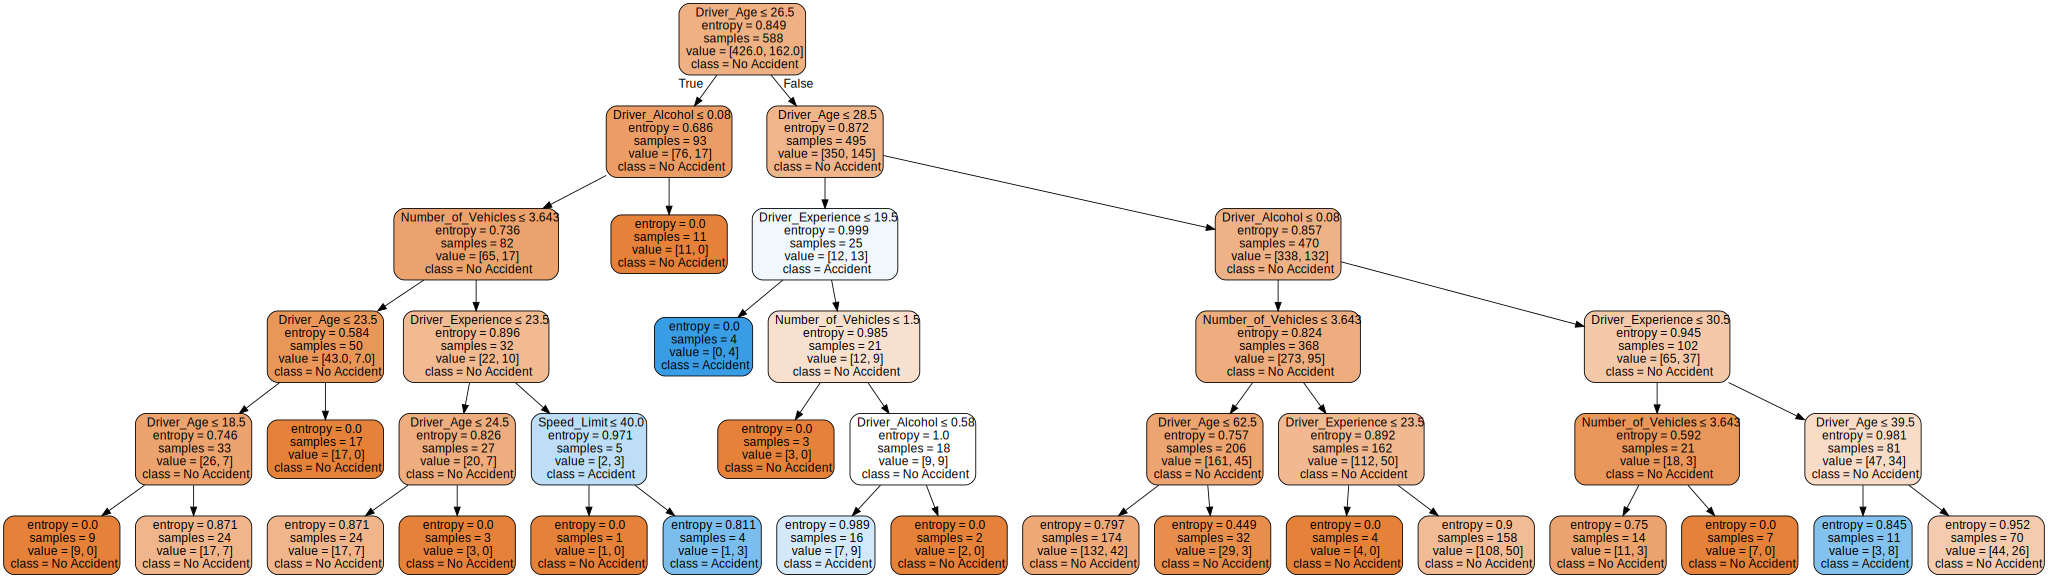

Accuracy: 0.6746031746031746


In [158]:
# Start with a maximum depth of 5 and entropy criterion
dtcEntropy5 = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='entropy')
dtcEntropy5.fit(X_train, y_train)
visualive_decision_tree(dtcEntropy5)
y_pred = dtcEntropy5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

**Tree Analysis:**



*   Increasing the maximum depth enables the decision tree to capture more complex patterns in the data. However, this comes at the expense of reduced interpretability and a higher risk of overfitting.
*   Changing the splitting criterion (e.g., from Gini impurity to information gain/entropy) influences how the tree selects features for splitting. Notably, Gini impurity often results in simpler trees compared to entropy.
*  Setting the maximum depth too high can significantly increase the risk of overfitting, as the model may begin to memorize noise in the training data rather than generalizing to unseen data.



### What is Sensitivity Analysis?

Sensitivity analysis is a method used for understanding changes to the output of a model under a specific set of assumptions after making changes to the input variables. Sometimes refereed to a "what-if" simulation analysis.

In machine learning, sensitivity analysis is particularly used to gain insight on:


*   Decision boundary behavior
*   Feature importance
*   Model robustness and interpretability



In [140]:
# Choose two features for sensitivity analysis
features = ['Traffic_Density', 'Speed_Limit']

# Create a range of values (unique values for categorical features)
feature_ranges = {
    'Traffic_Density': np.linspace(df['Traffic_Density'].min(), df['Traffic_Density'].max(), 10),  # 10 points between min and max
    'Speed_Limit': np.linspace(df['Speed_Limit'].min(), df['Speed_Limit'].max(), 10)  # 10 points between min and max
}


# Store results
results = {}

# Iterate over features
for feature in features:
    # Store accuracy for different feature values
    accuracy_scores = []

    # Iterate over feature range
    for value in feature_ranges[feature]:
        # Create a copy of the original dataset
        df_temp = df.copy()

        # Set the feature to the specific value
        df_temp[feature] = value

        # Split the data
        X_temp = df_temp.drop('Accident', axis=1)
        y_temp = df_temp['Accident']
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

        # Train and evaluate the model
        dtc =  DecisionTreeClassifier(random_state=42, max_depth=5, criterion='entropy') # using highest scoring params
        dtc.fit(X_train_temp, y_train_temp)
        y_pred_temp = dtc.predict(X_test_temp)
        accuracy = accuracy_score(y_test_temp, y_pred_temp)
        accuracy_scores.append(accuracy)

    # Store results for the feature
    results[feature] = accuracy_scores

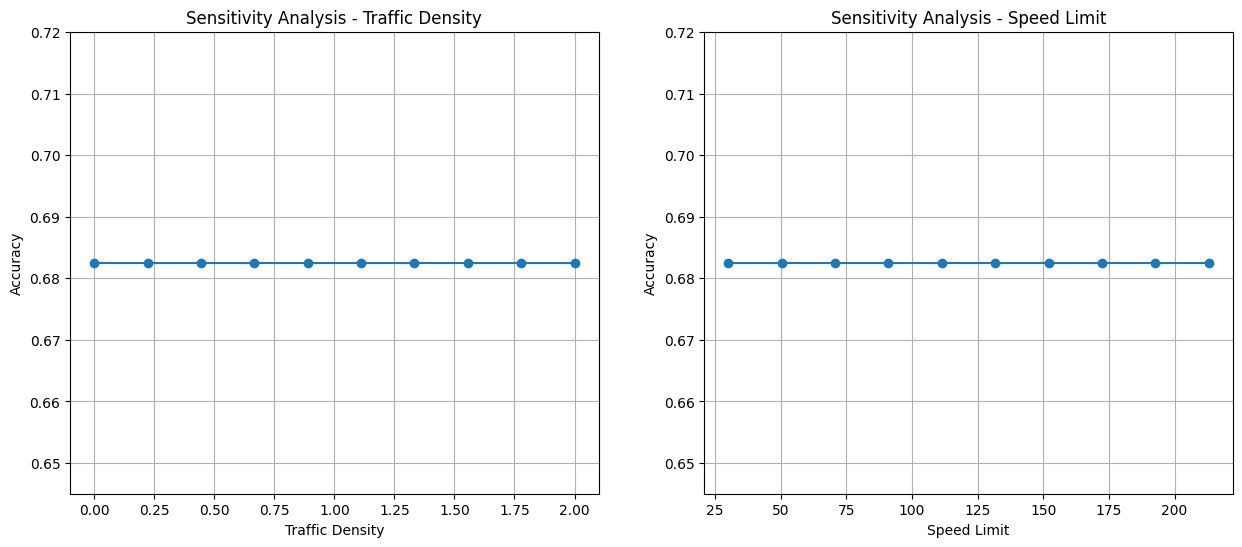

In [141]:
# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Create two subplots

# Plot for Traffic_Density
axs[0].plot(feature_ranges['Traffic_Density'], results['Traffic_Density'], marker='o')
axs[0].set_xlabel("Traffic Density")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Sensitivity Analysis - Traffic Density")
axs[0].grid(True)

# Plot for Speed_Limit
axs[1].plot(feature_ranges['Speed_Limit'], results['Speed_Limit'], marker='o')
axs[1].set_xlabel("Speed Limit")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Sensitivity Analysis - Speed Limit")
axs[1].grid(True)

plt.show()

Sources:

*   https://www.investopedia.com/terms/s/sensitivityanalysis.asp
*   https://fiveable.me/risk-assessment-and-management/unit-3/decision-trees/study-guide/Juo6HGAfS8osHY8K




## Task 2 (30 points):
From the Bagging and Boosting ensemble methods pick any one algorithm
from each category. Implement both the algorithms using the same data.
* Use stratified k-fold cross-validation with at least three different folds (e.g., 5, 10, 15).
You may do your own research on this technique (include citations).
* Evaluate the models using any three-evaluation metrics of your choice (e.g. accuracy,
Precision, F1-score etc.).
* Comment on the behavior of each algorithm under the metrics. Does the performance
ranking change based on the metric used? Why?

Will be implementing Random Forest and Gradient Boosting methods using the sklearn.ensemble methods

In [142]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Define K-fold splits
folds = [5,10,15]
eval_metrics = ['accuracy', 'precision_weighted', 'f1_weighted']

In [143]:
def evaluate_model(model, model_name):
  print(f"\nModel: {model_name}")
  results[model_name] = {}
  for k in folds:
      skfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
      print(f"  Stratified K-Fold: {k} folds")
      results[model_name][k] = {}
      for metric in eval_metrics:
          scores = cross_val_score(model, X_train, y_train, cv=skfold, scoring=metric, n_jobs=-1)
          mean_score = np.mean(scores)
          std_score = np.std(scores)
          results[model_name][k][metric] = (mean_score, std_score)
          print(f"    {metric.capitalize()}: {mean_score:.4f} ± {std_score:.4f}")

In [144]:

# Implement Random Forest with K-fold CV
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, 'Random Forest')


Model: Random Forest
  Stratified K-Fold: 5 folds
    Accuracy: 0.6769 ± 0.0423
    Precision_weighted: 0.6035 ± 0.0830
    F1_weighted: 0.6127 ± 0.0363
  Stratified K-Fold: 10 folds
    Accuracy: 0.6686 ± 0.0446
    Precision_weighted: 0.5913 ± 0.0743
    F1_weighted: 0.6181 ± 0.0522
  Stratified K-Fold: 15 folds
    Accuracy: 0.6904 ± 0.0478
    Precision_weighted: 0.6150 ± 0.0906
    F1_weighted: 0.6311 ± 0.0570


**Random Forest:**
* Highest accuracy (0.6904) and F1-score (0.6311) at 15 folds.
* Precision is consistently lower than accuracy and F1-score.
* Standard deviations increase with more folds, suggesting some sensitivity to data splits.

In [145]:
# Implement XGBoost with K-fold CV
xgb = GradientBoostingClassifier(random_state=42)
xgb.fit(X_train, y_train)
evaluate_model(xgb, 'Gradient Boosting')


Model: Gradient Boosting
  Stratified K-Fold: 5 folds
    Accuracy: 0.6837 ± 0.0202
    Precision_weighted: 0.5859 ± 0.0361
    F1_weighted: 0.6120 ± 0.0183
  Stratified K-Fold: 10 folds
    Accuracy: 0.6923 ± 0.0325
    Precision_weighted: 0.5924 ± 0.0859
    F1_weighted: 0.6183 ± 0.0422
  Stratified K-Fold: 15 folds
    Accuracy: 0.6801 ± 0.0374
    Precision_weighted: 0.5707 ± 0.0690
    F1_weighted: 0.6049 ± 0.0362


**Gradient Boosting:**
* Shows best accuracy (0.6923) at 10 folds, but performance doesn't consistently improve with more folds
* Precision is consistently the weakest metric.
* Generally smaller standard deviations than Random Forest, especially at lower fold counts.


**Analysis**



1.   Accuracy
  *   Gradient Boosting outperforms Random Forest outperforms at 10 folds (0.6923 vs 0.6686)
  * Random Forest performs better at 15 folds (0.6904 vs 0.6801)

2.   Precision
  *  Random Forest consistently outperforms Gradient Boosting across all fold counts.
  *. The difference is most pronounced at 15 folds (0.6150 vs 0.5707).

3.   F1 Scores
  * Random Forest generally performs better, except at 10 folds where they're nearly equal.
  * The difference is most noticeable at 15 folds (0.6311 vs 0.6049)

**Why?**

* Algorithm Differences:
    * Random Forest's ensemble approach (parallel trees) may handle class imbalances better for precision
    * Gradient Boosting's sequential correction may focus more on overall accuracy

* Metric Sensitivities:
    * Precision is more sensitive to false positives - Random Forest's voting mechanism may be more robust here
    * F1-score balances precision and recall - both algorithms perform similarly as they both handle recall reasonably well
    * Accuracy favors Gradient Boosting when the overall correct prediction rate is slightly better

Sources:
* https://medium.com/@juanc.olamendy/a-comprehensive-guide-to-stratified-k-fold-cross-validation-for-unbalanced-data-014691060f17

## Task 3 (40 points): Compare the effectiveness of the three models implemented above. Analyze the results using the following:
* A confusion matrix for one selected test fold.
* A statistical test (e.g., paired t-test) to determine if differences between models are
significant.
* A discussion on the trade-off between bias and variance for each model.

In [146]:
## confusion matrix for selected test fold
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print(classification_report(y_true, y_pred))

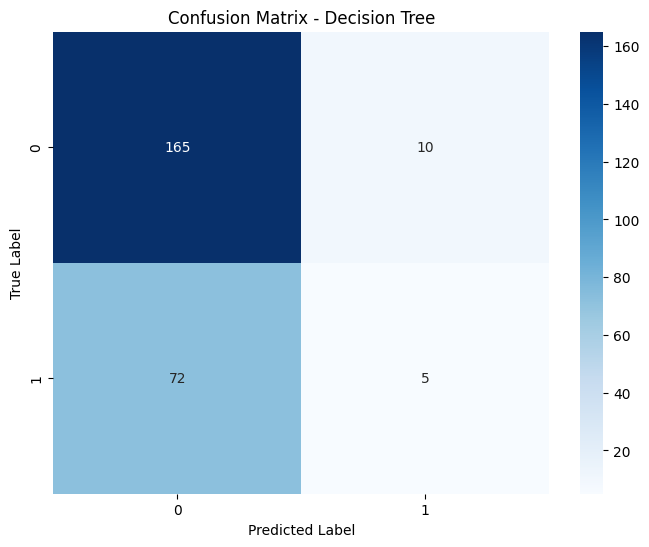

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       175
           1       0.33      0.06      0.11        77

    accuracy                           0.67       252
   macro avg       0.51      0.50      0.45       252
weighted avg       0.59      0.67      0.59       252



In [147]:
# Plot confusion matrix for model1
plot_confusion_matrix(y_test, y_pred, 'Decision Tree')

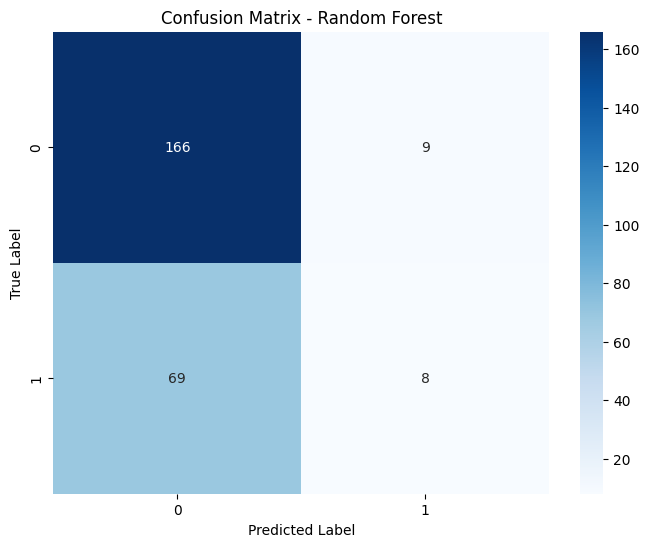

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       175
           1       0.47      0.10      0.17        77

    accuracy                           0.69       252
   macro avg       0.59      0.53      0.49       252
weighted avg       0.63      0.69      0.61       252



In [152]:
# Plot confusion matrix for model2
y_predRf = rf.predict(X_test)
plot_confusion_matrix(y_test, y_predRf, 'Random Forest')

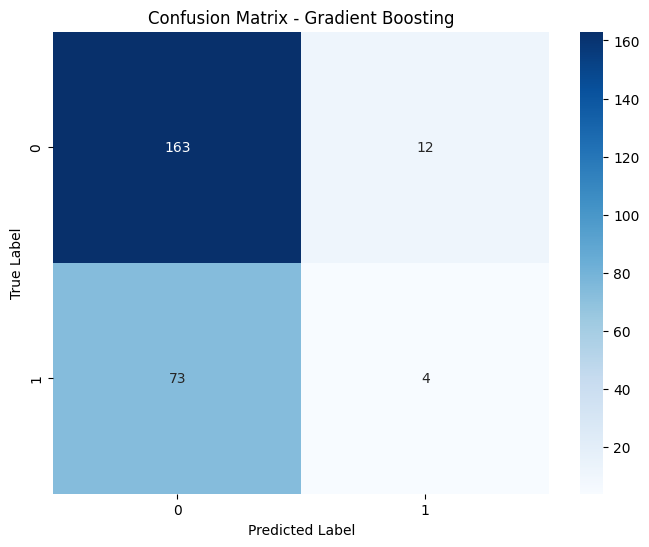

              precision    recall  f1-score   support

           0       0.69      0.93      0.79       175
           1       0.25      0.05      0.09        77

    accuracy                           0.66       252
   macro avg       0.47      0.49      0.44       252
weighted avg       0.56      0.66      0.58       252



In [153]:
# Plot confusion matrix for model3
y_predXgb = xgb.predict(X_test)
plot_confusion_matrix(y_test, y_predXgb, 'Gradient Boosting')

In [154]:
## statistical test to determin if diff between models is significant

# (Paired t-test)
def paired_t_test(y_true, model1_preds, model2_preds, model_name1, model_name2):

    # Calculate errors (0 for correct, 1 for incorrect)
    errors1 = (y_true != model1_preds).astype(int)
    errors2 = (y_true != model2_preds).astype(int)
    diffs = errors1 - errors2
    # print(np.array_equal(model1_preds, model2_preds))
    # print("Differences:", diffs)
    # print("Variance in differences:", np.var(diffs))
    # Perform paired t-test
    t_stat, p_value = stats.ttest_rel(errors1, errors2)

    print(f"Paired t-test between {model_name1} and {model_name2}:")
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

    if p_value < 0.05:
        print("The difference between the models is statistically significant.")
    else:
        print("The difference between the models is not statistically significant.")
    print()

In [155]:
paired_t_test(y_test, y_pred, y_predRf, 'Decision Tree', 'Random Forest')
paired_t_test(y_test, y_pred, y_predXgb, 'Decision Tree', 'Gradient Boosting')
paired_t_test(y_test, y_predRf, y_predXgb, 'Random Forest', 'Gradient Boosting')

Paired t-test between Decision Tree and Random Forest:
T-statistic: 0.7838642002638749, P-value: 0.4338588695472323
The difference between the models is not statistically significant.

Paired t-test between Decision Tree and Gradient Boosting:
T-statistic: -0.6247861220363886, P-value: 0.5326789789877286
The difference between the models is not statistically significant.

Paired t-test between Random Forest and Gradient Boosting:
T-statistic: -1.6109851844141128, P-value: 0.10843972432982373
The difference between the models is not statistically significant.



Sources:

* https://www.w3schools.com/python/python_ml_confusion_matrix.asp